<a href="https://colab.research.google.com/github/dpurbosakti/rock_paper_scissors/blob/master/Submission_Dwi_Atmoko_Purbo_Sakti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
!wget --no-check-certificate / https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

/: Scheme missing.
--2021-05-12 02:44:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  26.8MB/s    in 11s     

2021-05-12 02:44:17 (26.8 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]

FINISHED --2021-05-12 02:44:17--
Total wall clock time: 12s
Downloaded: 1 files, 308M in 11s (26.8 MB/s)


In [4]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')

In [5]:
os.listdir(base_dir)

['rps-cv-images', 'scissors', 'README_rpc-cv-images.txt', 'paper', 'rock']

In [6]:
os.listdir(train_dir)

['scissors', 'README_rpc-cv-images.txt', 'paper', 'rock']

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.4
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.4
)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,150),
    shuffle=True,
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(100,150),
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')       
])

In [10]:
model.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
               metrics=['accuracy'])

In [11]:
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=0, write_graph=True, write_images=False,
    update_freq='epoch', embeddings_freq=0,
    embeddings_metadata=None
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 128)        7

In [12]:
batch_size = 16

model.fit(train_generator, 
  epochs =  10, 
  steps_per_epoch = 660//batch_size, 
  validation_data = validation_generator, 
  verbose = 1, 
  validation_steps = 437//batch_size,
  callbacks =[lr_schedule, tb_callback])

Epoch 1/10

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
41/41 [==============================] - 44s 335ms/step - loss: 1.1194 - accuracy: 0.4076 - val_loss: 0.5983 - val_accuracy: 0.8183
Epoch 2/10

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
41/41 [==============================] - 13s 315ms/step - loss: 0.5898 - accuracy: 0.7621 - val_loss: 0.2659 - val_accuracy: 0.9086
Epoch 3/10

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
41/41 [==============================] - 13s 318ms/step - loss: 0.3204 - accuracy: 0.8820 - val_loss: 0.2161 - val_accuracy: 0.9271
Epoch 4/10

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
41/41 [==============================] - 13s 316ms/step - loss: 0.2623 - accuracy: 0.9041 - val_loss: 0.1801 - val_accuracy: 0.9398
Epoch 5/10

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0010000000474

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
0CSaM2vL2cWX6Cay.png
scissors


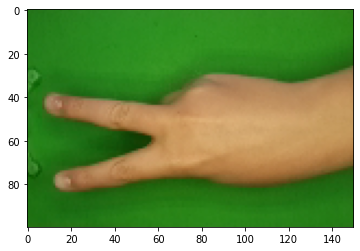

In [14]:
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')

Dwi Atmoko Purbo Sakti |
Malang, Jawa timur